# varicelle

Les données de l'incidence la varicelle sont disponibles du site Web du Réseau Sentinelles. Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1999 semaine 49 et se termine avec une semaine récente : 2022 semaine 6.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [3]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [4]:
raw_data = pd.read_csv(data_url, skiprows=1)
type(raw_data)

pandas.core.frame.DataFrame

In [5]:
len(raw_data)

1628

In [7]:
raw_data[:5]

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202206          7  10414     7128   13700      16          11         21   
1  202205          7  10866     7758   13974      16          11         21   
2  202204          7   9547     6721   12373      14          10         18   
3  202203          7  13972    10680   17264      21          16         26   
4  202202          7   8495     6026   10964      13           9         17   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

In [8]:
raw_data[-5:]

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
1623  199101          7  15565    10271   20859      27          18   
1624  199052          7  19375    13295   25455      34          23   
1625  199051          7  19080    13807   24353      34          25   
1626  199050          7  11079     6660   15498      20          12   
1627  199049          7   1143        0    2610       2           0   

      inc100_up geo_insee geo_name  
1623         36        FR   France  
1624         45        FR   France  
1625         43        FR   France  
1626         28        FR   France  
1627          5        FR   France

In [9]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [11]:
data = raw_data.copy()

In [13]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]
len(data)

1628

In [16]:
data[:5]

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202206          7  10414     7128   13700      16          11         21   
1  202205          7  10866     7758   13974      16          11         21   
2  202204          7   9547     6721   12373      14          10         18   
3  202203          7  13972    10680   17264      21          16         26   
4  202202          7   8495     6026   10964      13           9         17   

  geo_insee geo_name                period  
0        FR   France 2022-02-07/2022-02-13  
1        FR   France 2022-01-31/2022-02-06  
2        FR   France 2022-01-24/2022-01-30  
3        FR   France 2022-01-17/2022-01-23  
4        FR   France 2022-01-10/2022-01-16

In [17]:
data[-5:]

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
1623  199101          7  15565    10271   20859      27          18   
1624  199052          7  19375    13295   25455      34          23   
1625  199051          7  19080    13807   24353      34          25   
1626  199050          7  11079     6660   15498      20          12   
1627  199049          7   1143        0    2610       2           0   

      inc100_up geo_insee geo_name                period  
1623         36        FR   France 1990-12-31/1991-01-06  
1624         45        FR   France 1990-12-24/1990-12-30  
1625         43        FR   France 1990-12-17/1990-12-23  
1626         28        FR   France 1990-12-10/1990-12-16  
1627          5        FR   France 1990-12-03/1990-12-09

In [15]:
sorted_data = data.set_index('period').sort_index()

In [20]:
sorted_data[:5]

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
1990-12-03/1990-12-09           0          5        FR   France  
1990-12-10/1990-12-16          12         28        FR   France  
1990-12-17/1990-12-23          25         43        FR   France  
1990-12-24/1990-12-30          23         45        FR   France  
1990-12-31/1991-01-06          18         36        FR   France

In [19]:
sorted_data[-5:]

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
2022-01-10/2022-01-16  202202          7   8495     6026   10964      13   
2022-01-17/2022-01-23  202203          7  13972    10680   17264      21   
2022-01-24/2022-01-30  202204          7   9547     6721   12373      14   
2022-01-31/2022-02-06  202205          7  10866     7758   13974      16   
2022-02-07/2022-02-13  202206          7  10414     7128   13700      16   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
2022-01-10/2022-01-16           9         17        FR   France  
2022-01-17/2022-01-23          16         26        FR   France  
2022-01-24/2022-01-30          10         18        FR   France  
2022-01-31/2022-02-06          11         21        FR   France  
2022-02-07/2022-02-13          11         21        FR   France

In [22]:
periods = sorted_data.index
cpt = 0
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)
print(f'cpt = {cpt}')

cpt = 0


In [26]:
p1

Period('2022-01-31/2022-02-06', 'W-SUN')

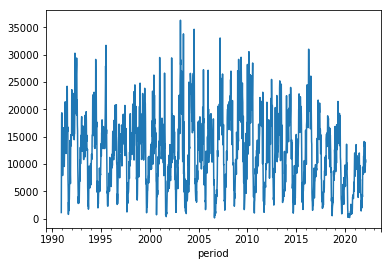

In [29]:
sorted_data['inc'].plot()

In [ ]:
Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

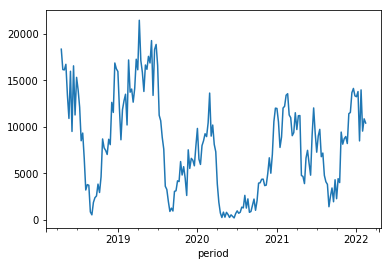

In [30]:
sorted_data['inc'][-200:].plot()

# Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval entre deux années civiles, nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année 𝑁
au 1er août de l'année 𝑁+1

.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er septembre de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de la varicelle est très faible en été, cette modification ne risque pas de fausser nos conclusions.

Encore 2 petit détails: les données commencent en décembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991 et la période 01/09/2021 - 13/02/2022 ne constitue pas une année complète non plus.

In [48]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(sorted_data.index[0].year,
                                    sorted_data.index[-1].year+1)]
print(f'len(first_sept_week)={len(first_sept_week)}')

len(first_sept_week)=33


In [49]:
first_sept_week[:5]

[Period('1990-08-27/1990-09-02', 'W-SUN'),
 Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN')]

In [50]:
first_sept_week[-5:]

[Period('2018-08-27/2018-09-02', 'W-SUN'),
 Period('2019-08-26/2019-09-01', 'W-SUN'),
 Period('2020-08-31/2020-09-06', 'W-SUN'),
 Period('2021-08-30/2021-09-05', 'W-SUN'),
 Period('2022-08-29/2022-09-04', 'W-SUN')]

In [52]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    if abs(len(one_year)-52) < 2 :
        yearly_incidence.append(one_year.sum())
        year.append(week2.year)
        print(week1, week2, len(one_year), "is complete")
    else:
        print(week1, week2, len(one_year), "is not complete")
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

1990-08-27/1990-09-02 1991-08-26/1991-09-01 38 is not complete
1991-08-26/1991-09-01 1992-08-31/1992-09-06 53 is complete
1992-08-31/1992-09-06 1993-08-30/1993-09-05 52 is complete
1993-08-30/1993-09-05 1994-08-29/1994-09-04 52 is complete
1994-08-29/1994-09-04 1995-08-28/1995-09-03 52 is complete
1995-08-28/1995-09-03 1996-08-26/1996-09-01 52 is complete
1996-08-26/1996-09-01 1997-09-01/1997-09-07 53 is complete
1997-09-01/1997-09-07 1998-08-31/1998-09-06 52 is complete
1998-08-31/1998-09-06 1999-08-30/1999-09-05 52 is complete
1999-08-30/1999-09-05 2000-08-28/2000-09-03 52 is complete
2000-08-28/2000-09-03 2001-08-27/2001-09-02 52 is complete
2001-08-27/2001-09-02 2002-08-26/2002-09-01 52 is complete
2002-08-26/2002-09-01 2003-09-01/2003-09-07 53 is complete
2003-09-01/2003-09-07 2004-08-30/2004-09-05 52 is complete
2004-08-30/2004-09-05 2005-08-29/2005-09-04 52 is complete
2005-08-29/2005-09-04 2006-08-28/2006-09-03 52 is complete
2006-08-28/2006-09-03 2007-08-27/2007-09-02 52 is co

In [53]:
len(yearly_incidence)

30

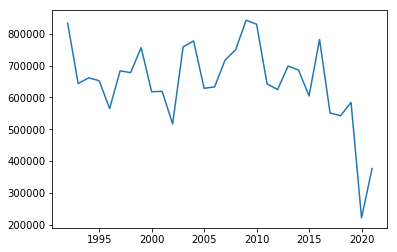

In [57]:
yearly_incidence.plot()

In [54]:
yearly_incidence

1992    832939
1993    643387
1994    661409
1995    652478
1996    564901
1997    683434
1998    677775
1999    756456
2000    617597
2001    619041
2002    516689
2003    758363
2004    777388
2005    628464
2006    632833
2007    717352
2008    749478
2009    842373
2010    829911
2011    642368
2012    624573
2013    698332
2014    685769
2015    604382
2016    782114
2017    551041
2018    542312
2019    584066
2020    221186
2021    376290
dtype: int64

In [56]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

In [59]:
type(yearly_incidence)

pandas.core.series.Series

In [61]:
yearly_incidence.values

array([832939, 643387, 661409, 652478, 564901, 683434, 677775, 756456,
       617597, 619041, 516689, 758363, 777388, 628464, 632833, 717352,
       749478, 842373, 829911, 642368, 624573, 698332, 685769, 604382,
       782114, 551041, 542312, 584066, 221186, 376290])

In [64]:
yearly_incidence.index

Int64Index([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64')

In [67]:
yearly_incidence.max()

842373

In [68]:
yearly_incidence.idxmax()

2009

In [70]:
yearly_incidence.min()

221186

In [71]:
yearly_incidence.idxmin()

2020